## Recommender System with Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('../datasets/u.data',sep='\t',names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_names = pd.read_csv('../datasets/Movie_Id_Titles')

In [5]:
movie_names.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df = pd.merge(df,movie_names,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## EDA 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

** Let's create a ratings dataframe with average rating and number of ratings: **

In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending=False))
ratings.tail()

,rating
title,
Touki Bouki (Journey of the Hyena) (1973),1.0
JLG/JLG - autoportrait de décembre (1994),1.0
Daens (1992),1.0
Butterfly Kiss (1995),1.0
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0


In [11]:
ratings['number of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending=False))
ratings.head()

,rating,number of ratings
title,,
Marlene Dietrich: Shadow and Light (1996),5.0,1
Prefontaine (1997),5.0,3
Santa with Muscles (1996),5.0,2
Star Kid (1997),5.0,3
Someone Else's America (1995),5.0,1


### Show some histograms

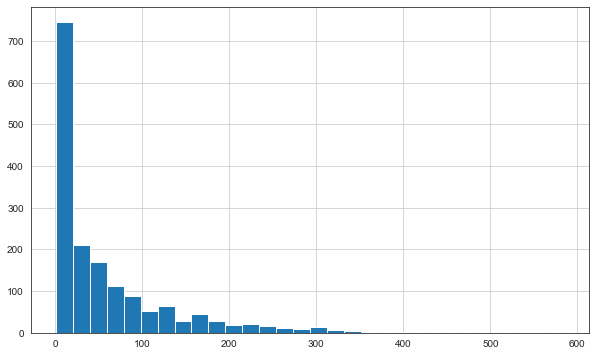

In [18]:
plt.figure(figsize=(10,6))
ratings['number of ratings'].hist(bins=30)

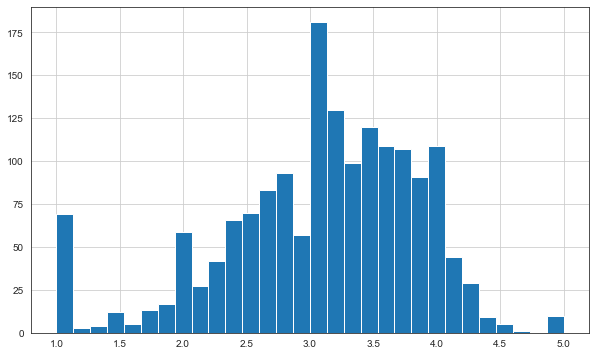

In [20]:
plt.figure(figsize=(10,6))
ratings['rating'].hist(bins=30)

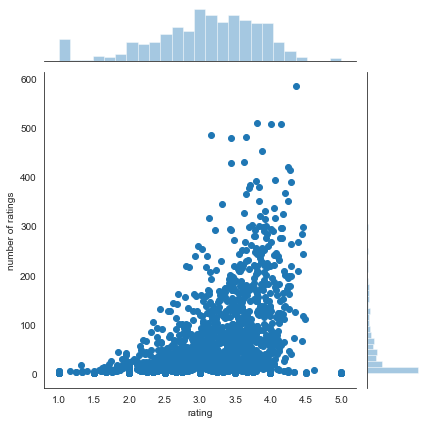

In [26]:
sns.jointplot(x='rating', y='number of ratings',data=ratings)

** Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system: **

## Recommeding Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. Note there will be a lot of NaN values, because most people have not seen most of the movies.

In [12]:
moviemat= df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Most Rated Movies

In [13]:
ratings['number of ratings'].sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: number of ratings, dtype: int64

** Let's choose two movies Star wars a sci-fi movie and Toy Story an animation movie **

In [14]:
starwars_users_rating = moviemat['Star Wars (1977)']
toystory_users_rating = moviemat['Toy Story (1995)']
starwars_users_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [15]:
similar_to_starwars = moviemat.corrwith(starwars_users_rating)
similar_to_toystory = moviemat.corrwith(toystory_users_rating)

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [16]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [17]:
corr_starwars.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


Let's fix this by filtering out movies that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [18]:
corr_starwars = corr_starwars.join(ratings['number of ratings'])
corr_starwars.head()

,Correlation,number of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now sort the values

In [19]:
corr_starwars[corr_starwars['number of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


** Now doing same for the Toy Story **

In [21]:
corr_toystory = pd.DataFrame(similar_to_toystory,columns=['Correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory =  corr_toystory.join(ratings['number of ratings'])
corr_toystory[corr_toystory['number of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,number of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
